In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import models.gora2021 as gora
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "M04"


In [3]:
preprocess(abbr,verbose=False)
gora_df = gora.gora2021(abbr,verbose=False)


M04


100%|██████████| 195/195 [00:02<00:00, 83.37it/s]


In [4]:
print(gora_df.columns.values)


['time' 'time_rel' 'vx' 'vy' 'vz' 'wz' 'current' 'voltage' 'ax' 'ay' 'az'
 'theta' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'px' 'py' 'pz'
 'I_L' 'I_R' 'V_L' 'V_R' 'lat' 'long' 'alt' 'ax_corr' 'ay_corr' 'az_corr'
 'P_total' 'v' 'a' 'vL' 'vR' 'deltaV' 'Bs_naive' 'P_logical' 'P_motion'
 'ICRx' 'ICRy' 'ICRyL' 'ICRyR' 'Bs' 'R' 'normal_force' 'dx_front'
 'dx_rear' 'dy_left' 'dy_right' 'd_fl' 'd_fr' 'd_rl' 'd_rr' 'dist_asym'
 'dist_sym' 'JS_asym' 'JS_sym' 'JG' 'm_sym' 'G_sym' 'err_sym' 'm_asym'
 'G_asym' 'err_asym' 'Ppredt_sym' 'Perrt_sym' 'Ppredc_sym' 'Perrc_sym'
 'Ppredt_asym' 'Perrt_asym' 'Ppredc_asym' 'Perrc_asym' 'energy_Wh'
 'Epredt_sym_Wh' 'Epredt_asym_Wh' 'Epredc_sym_Wh' 'Epredc_asym_Wh']


(-10.0, 10.0)

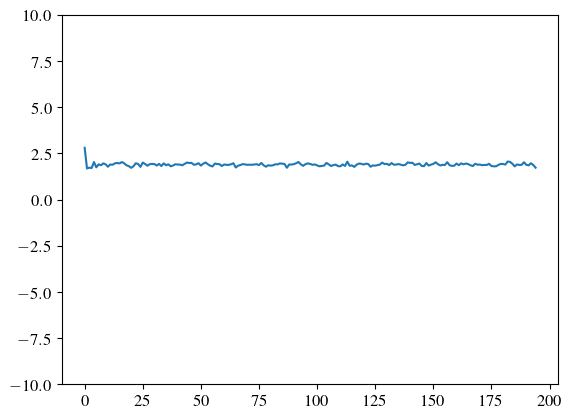

In [5]:
axlim = 10
fig, ax = plt.subplots()
(gora_df.ICRyL - gora_df.ICRyR).plot(ax=ax)
ax.set_ylim(bottom=-axlim, top=axlim)

In [6]:
mask = gora_df.index >= 10

index = gora_df.index[mask]
power = gora_df.P_total[mask]

mu_asym = gora_df.m_asym[mask]
G_asym = gora_df.G_asym[mask]

mu_sym = gora_df.m_sym[mask]
G_sym = gora_df.G_sym[mask]


In [7]:
model_name = gora.__MODEL_NAME__.lower()
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename, subdir=model_name)

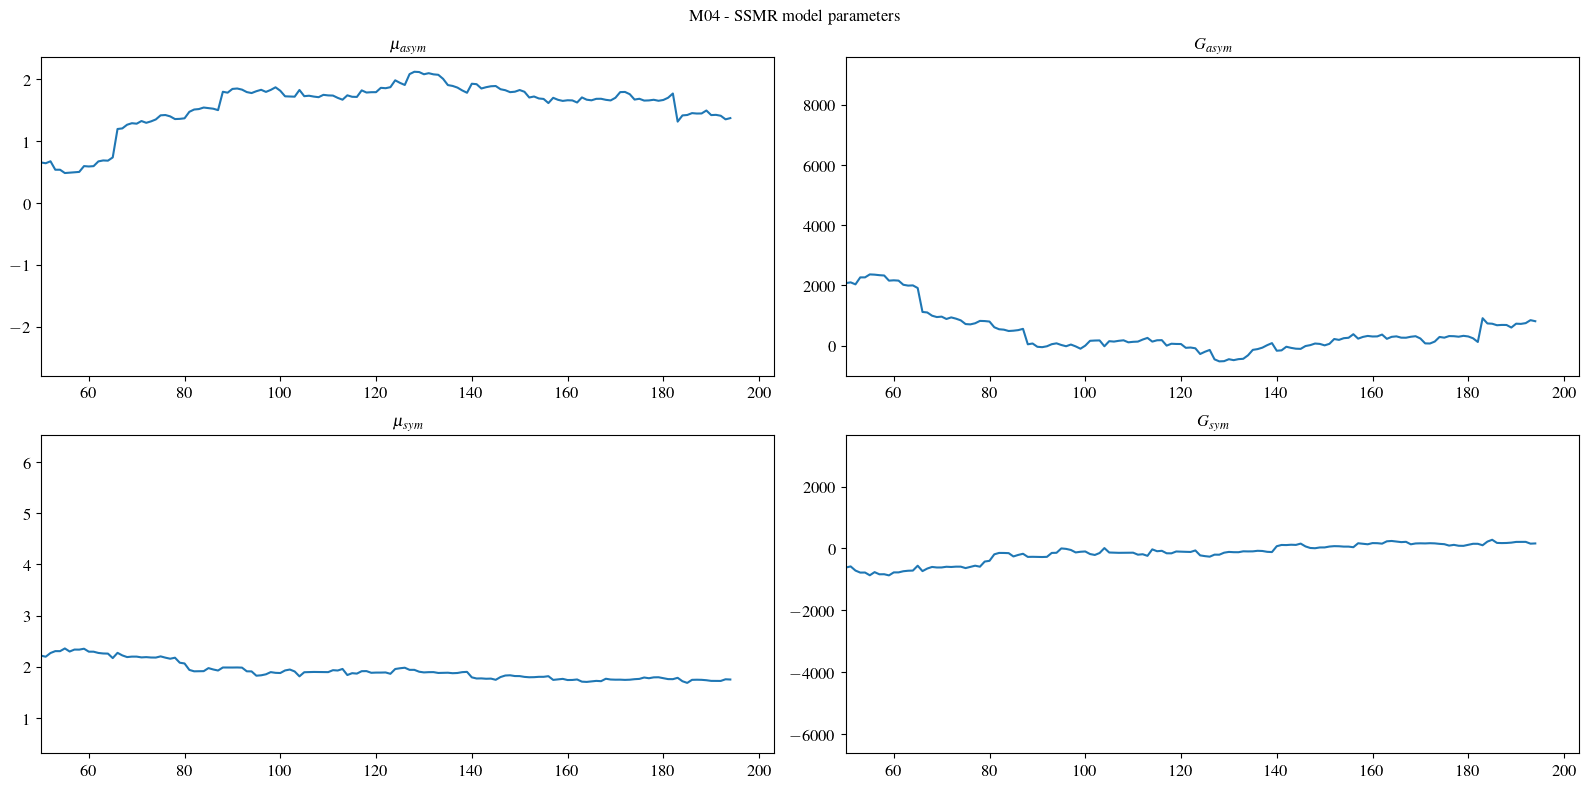

In [8]:
fig, subfigs = plt.subplots(ncols=2, nrows=2, figsize = (16,8))
cols = ("m_asym", "G_asym", "m_sym", "G_sym")

for col, ax in zip(cols, subfigs.reshape(-1)):
    gora_df[mask][col].plot(ax=ax)
    if col.startswith("m_"):
        title_txt = f"\{col.replace('m_', 'mu_')}"
    else:
        title_txt = col
    title_txt = title_txt.replace("_asym", "_{{asym}}")
    title_txt = title_txt.replace("_sym", "_{{sym}}")

    ax.set_xlim(left=50)

    ax.set_title(f"${title_txt}$")

fig.suptitle(f"{abbr} - SSMR model parameters")
fig.tight_layout()
fig.savefig(figdir / f"{abbr}_parameters.jpg", bbox_inches="tight")


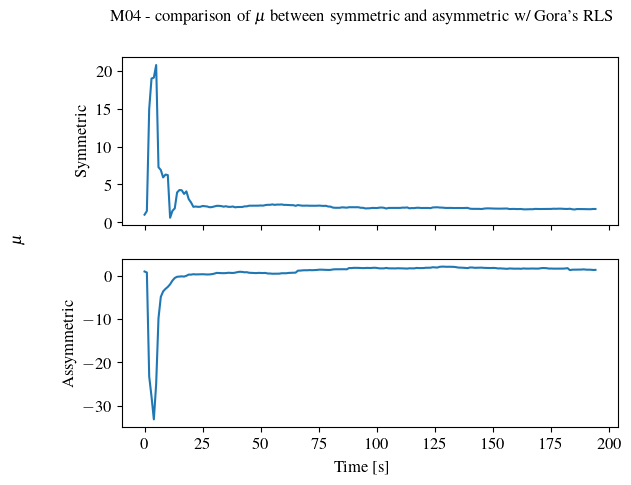

In [9]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
gora_df.m_sym.plot(ax=ax1)
gora_df.m_asym.plot(ax=ax2)
ax1.set_ylabel("Symmetric")
ax2.set_ylabel("Assymmetric")
fig.supylabel("$\mu$", x=-0.05)
fig.supxlabel("Time [s]")
fig.suptitle(f"{abbr} - comparison of $\mu$ between symmetric and asymmetric w/ Gora's RLS")

fig.savefig(figdir / f"{abbr}_m.jpg", bbox_inches="tight")

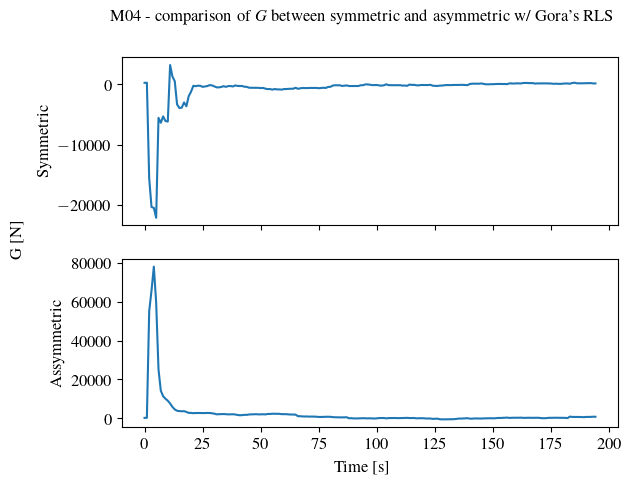

In [10]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
gora_df.G_sym.plot(ax=ax1)
gora_df.G_asym.plot(ax=ax2)
ax1.set_ylabel("Symmetric")
ax2.set_ylabel("Assymmetric")
fig.supylabel("G [N]", x=-0.05)
fig.supxlabel("Time [s]")
fig.suptitle(f"{abbr} - comparison of $G$ between symmetric and asymmetric w/ Gora's RLS")

fig.savefig(figdir / f"{abbr}_G.jpg", bbox_inches="tight")

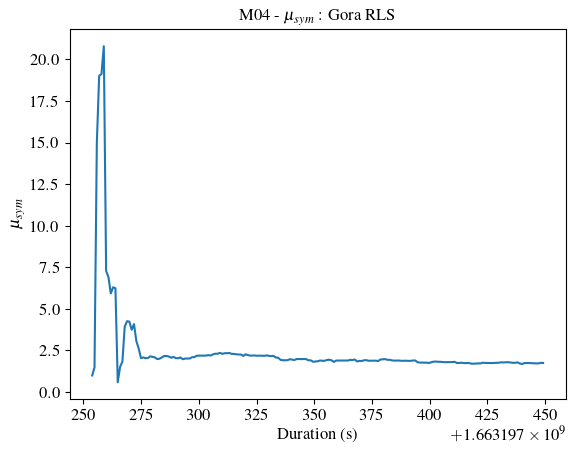

In [11]:
fig, ax = plt.subplots()
ax.plot(gora_df.time, gora_df.m_sym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\mu_{sym}$", x=-0.05)
ax.set_title(f"{abbr} - $\mu_{{sym}}$ : Gora RLS")

fig.savefig(figdir / f"{abbr}_m_sym.jpg", bbox_inches="tight")

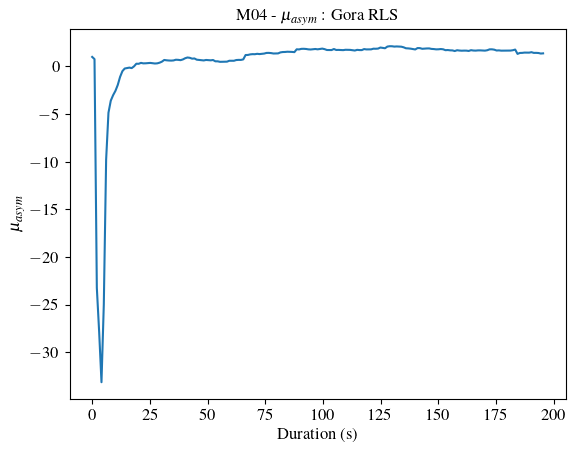

In [12]:
fig, ax = plt.subplots()
ax.plot(gora_df.time_rel, gora_df.m_asym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\mu_{asym}$", x=-0.05)
ax.set_title(f"{abbr} - $\mu_{{asym}}$ : Gora RLS")

fig.savefig(figdir / f"{abbr}_m_asym.jpg", bbox_inches="tight")


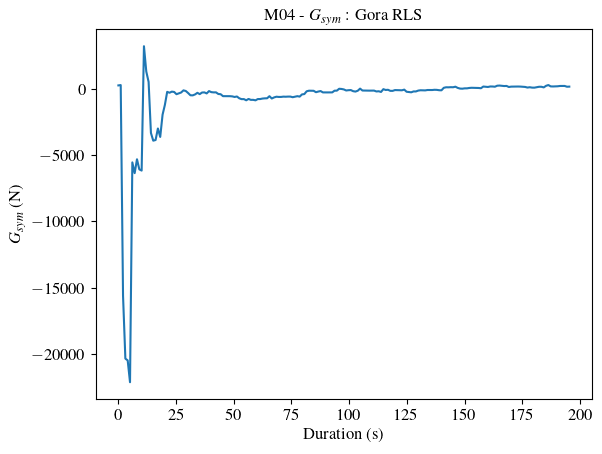

In [13]:
fig, ax = plt.subplots()
ax.plot(gora_df.time_rel, gora_df.G_sym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$G_{sym}$ (N)", x=-0.05)
ax.set_title(f"{abbr} - $G_{{sym}}$ : Gora RLS")

fig.savefig(figdir / f"{abbr}_G_sym.jpg", bbox_inches="tight")

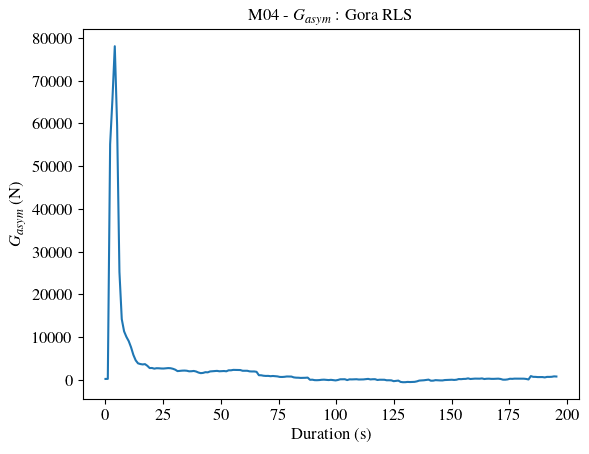

In [14]:
fig, ax = plt.subplots()
ax.plot(gora_df.time_rel, gora_df.G_asym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$G_{asym}$ (N)", x=-0.05)
ax.set_title(f"{abbr} - $G_{{asym}}$ : Gora RLS")

fig.savefig(figdir / f"{abbr}_G_asym.jpg", bbox_inches="tight")

# DONE

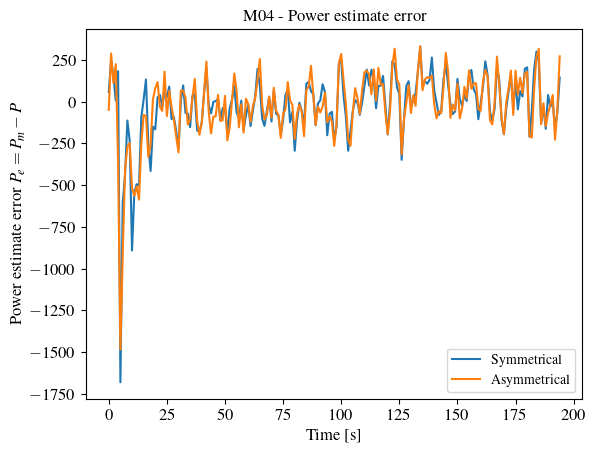

In [15]:
fig, ax = plt.subplots()
gora_df.Perrt_sym.plot(ax=ax, label="Symmetrical")
gora_df.Perrt_asym.plot(ax=ax, label="Asymmetrical")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(figdir / f"{abbr}_Perror.jpg", bbox_inches="tight")

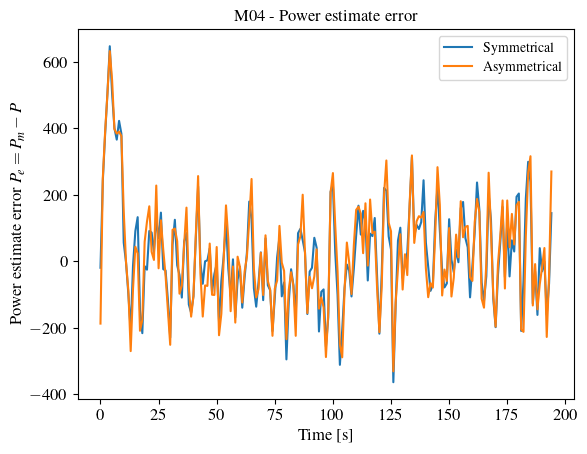

In [16]:
fig, ax = plt.subplots()
gora_df.Perrc_sym.plot(ax=ax, label="Symmetrical")
gora_df.Perrc_asym.plot(ax=ax, label="Asymmetrical")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(figdir / f"{abbr}_Perror.jpg", bbox_inches="tight")

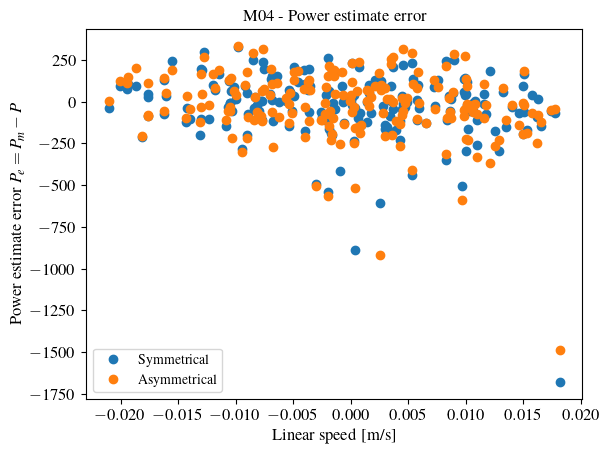

In [17]:
fig, ax = plt.subplots()
ax.plot(gora_df.vx, gora_df.Perrt_sym, "o", label="Symmetrical")
ax.plot(gora_df.vx, gora_df.Perrt_asym, "o", label="Asymmetrical")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Linear speed [m/s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(figdir / f"{abbr}_Perror_vx.jpg", bbox_inches="tight")

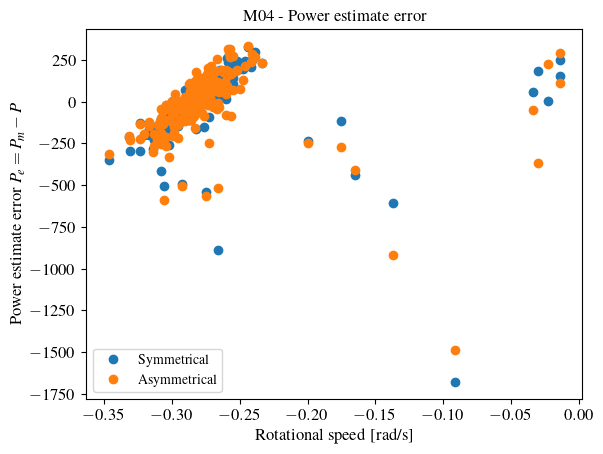

In [18]:
fig, ax = plt.subplots()
ax.plot(gora_df.wz, gora_df.Perrt_sym, "o", label="Symmetrical")
ax.plot(gora_df.wz, gora_df.Perrt_asym, "o", label="Asymmetrical")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Rotational speed [rad/s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(figdir / f"{abbr}_Perror_wz.jpg", bbox_inches="tight")

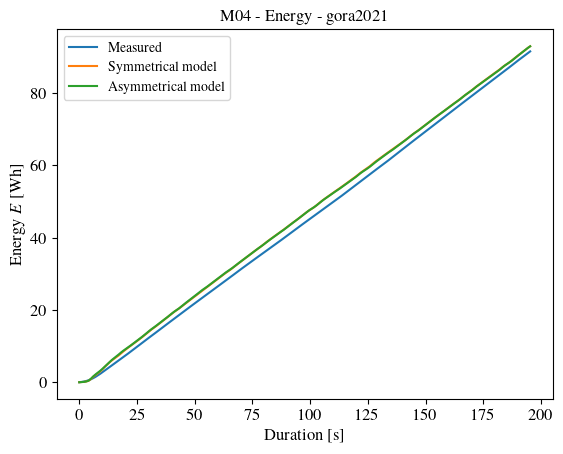

In [19]:
fig, ax = plt.subplots()
ax.plot(gora_df.time_rel, gora_df.energy_Wh, label="Measured")
ax.plot(gora_df.time_rel, gora_df.Epredt_sym_Wh, label="Symmetrical model")
ax.plot(gora_df.time_rel, gora_df.Epredt_asym_Wh, label="Asymmetrical model")
ax.legend()

ax.set_ylabel("Energy $E$ [Wh]")
ax.set_xlabel("Duration [s]")
ax.set_title(f"{abbr} - Energy - {model_name}")
fig.savefig(figdir / f"{abbr}_EnergyWh.jpg", bbox_inches="tight")


AttributeError: 'DataFrame' object has no attribute 'Epred_sym_Wh'

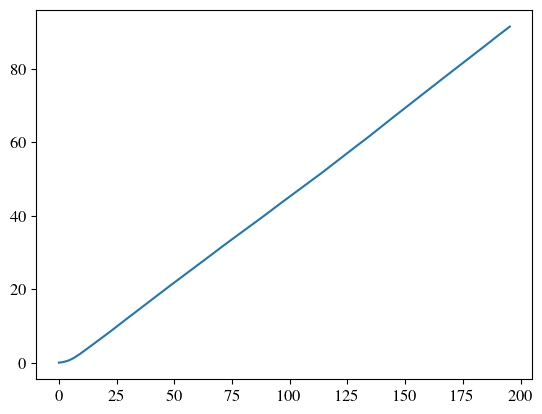

In [20]:
fig, ax = plt.subplots()
ax.plot(gora_df.time_rel, gora_df.energy_Wh, label="Measured")
ax.plot(gora_df.time_rel, gora_df.Epred_sym_Wh, label="Symmetrical model")
ax.plot(gora_df.time_rel, gora_df.Epred_asym_Wh, label="Asymmetrical model")
ax.legend()

ax.set_xlim(left=0, right=50)
ax.set_ylim(bottom=0, top=5)

ax.set_ylabel("Energy $E$ [Wh]")
ax.set_xlabel("Duration [s]")
ax.set_title(f"{abbr} - Energy - {model_name}")
fig.savefig(figdir / f"{abbr}_EnergyWh_start.jpg", bbox_inches="tight")


In [ ]:
fig, ax = plt.subplots()
ax.plot(gora_df.time_rel, gora_df.energy_Wh, label="Measured")
ax.plot(gora_df.time_rel, gora_df.Epred_sym_Wh, label="Symmetrical model")
ax.plot(gora_df.time_rel, gora_df.Epred_asym_Wh, label="Asymmetrical model")
ax.legend()

ax.set_xlim(left=150, right=200)
ax.set_ylim(bottom=6)

ax.set_ylabel("Energy $E$ [Wh]")
ax.set_xlabel("Duration [s]")
ax.set_title(f"{abbr} - Energy - {model_name}")
fig.savefig(figdir / f"{abbr}_EnergyWh_end.jpg", bbox_inches="tight")


In [ ]:
cm = plt.get_cmap("turbo")
cnorm = mpl.colors.Normalize(vmin=min(gora_df.time_rel), vmax=max(gora_df.time_rel))
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)

fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(gora_df.m_sym, gora_df.G_sym, c=scmap.to_rgba(gora_df.time_rel))

ax.set_xlabel("${\mu}_{sym}$")
ax.set_ylabel("${G}_{sym}$")
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.2, ax=ax);
cb.ax.set_xlabel("Time [s]");

fig.suptitle(f"{abbr} - Values of $\mu$, $G$ for symmetric SSMR Gora model");

In [ ]:
cm = plt.get_cmap("turbo")
cnorm = mpl.colors.Normalize(vmin=min(gora_df.time_rel), vmax=max(gora_df.time_rel))
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)

fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(gora_df.m_asym, gora_df.G_asym, c=scmap.to_rgba(gora_df.time_rel))
ax.set_xlabel("${\mu}_{asym}$")
ax.set_ylabel("${G}_{asym}$")
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.2, ax=ax);
cb.ax.set_xlabel("Time [s]");

fig.suptitle(f"{abbr} - Values of $\mu$, $G$ for asymmetric SSMR Gora model");

In [ ]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(8, 6))
ax1.plot(gora_df.time_rel, gora_df.Epredt_sym_Wh, label="Model - instant", marker="^", markersize=2)
ax1.plot(gora_df.time_rel, gora_df.Epredc_sym_Wh, label="Model - converged")
ax1.plot(gora_df.time_rel, gora_df.energy_Wh, label="Measured")
ax1.legend()
ax1.set_title("Symmetrical")

ax2.plot(gora_df.time_rel, gora_df.Epredt_asym_Wh, label="Model - Instant", marker="^", markersize=2)
ax2.plot(gora_df.time_rel, gora_df.Epredc_asym_Wh, label="Model - Converged")
ax2.plot(gora_df.time_rel, gora_df.energy_Wh, label="Measured")
ax2.legend()
ax2.set_title("Asymmetrical")

fig.supylabel("Energy $E$ [Wh]")
fig.supxlabel("Duration [s]")
fig.suptitle(f"{abbr} - Energy - {model_name}")
fig.savefig(figdir / f"{abbr}_EnergyWh.jpg", bbox_inches="tight")